In [ ]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# loading the data
cs_df = pd.read_csv('../data/cleaned_data/online_retail_df.csv')

In [5]:
# checking the data
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396340 entries, 0 to 396339
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396340 non-null  int64  
 1   StockCode    396340 non-null  object 
 2   Description  396340 non-null  object 
 3   Quantity     396340 non-null  int64  
 4   InvoiceDate  396340 non-null  object 
 5   UnitPrice    396340 non-null  float64
 6   CustomerID   396340 non-null  float64
 7   Country      396340 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.2+ MB


So we will be creating three new features named:
1. Recency
2. Frequency
3. Monetary

In [10]:
cs_df['SalesLineTotal'] = cs_df['Quantity']*cs_df['UnitPrice']
cs_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
396335,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
396336,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
396337,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
396338,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [12]:
aggregated_df = cs_df.groupby(by='CustomerID',as_index=False) \
    .agg(
        MonetaryValue = ('SalesLineTotal','sum'),
        Frequency = ('InvoiceNo','nunique'),
        LastInvoice = ('InvoiceDate','max') 
    )

aggregated_df.head(10)

,CustomerID,MonetaryValue,Frequency,LastInvoice
0,12346.0,77183.60,1,2011-01-18 10:01:00
1,12347.0,4310.00,7,2011-12-07 15:52:00
2,12348.0,1437.24,4,2011-09-25 13:13:00
3,12349.0,1457.55,1,2011-11-21 09:51:00
4,12350.0,294.40,1,2011-02-02 16:01:00
5,12352.0,1385.74,7,2011-11-03 14:37:00
6,12353.0,89.00,1,2011-05-19 17:47:00
7,12354.0,1079.40,1,2011-04-21 13:11:00
8,12355.0,459.40,1,2011-05-09 13:49:00
9,12356.0,2487.43,3,2011-11-17 08:40:00


In [15]:
aggregated_df.dtypes

CustomerID       float64
MonetaryValue    float64
Frequency          int64
LastInvoice       object
dtype: object

In [16]:
aggregated_df['LastInvoice'] = pd.to_datetime(aggregated_df['LastInvoice'])
aggregated_df.dtypes

CustomerID              float64
MonetaryValue           float64
Frequency                 int64
LastInvoice      datetime64[ns]
dtype: object

In [17]:
max_invoice_date = aggregated_df['LastInvoice'].max()
max_invoice_date

Timestamp('2011-12-09 12:50:00')

In [19]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoice']).dt.days

aggregated_df.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
0,12346.0,77183.60,1,2011-01-18 10:01:00,325
1,12347.0,4310.00,7,2011-12-07 15:52:00,1
2,12348.0,1437.24,4,2011-09-25 13:13:00,74
3,12349.0,1457.55,1,2011-11-21 09:51:00,18
4,12350.0,294.40,1,2011-02-02 16:01:00,309


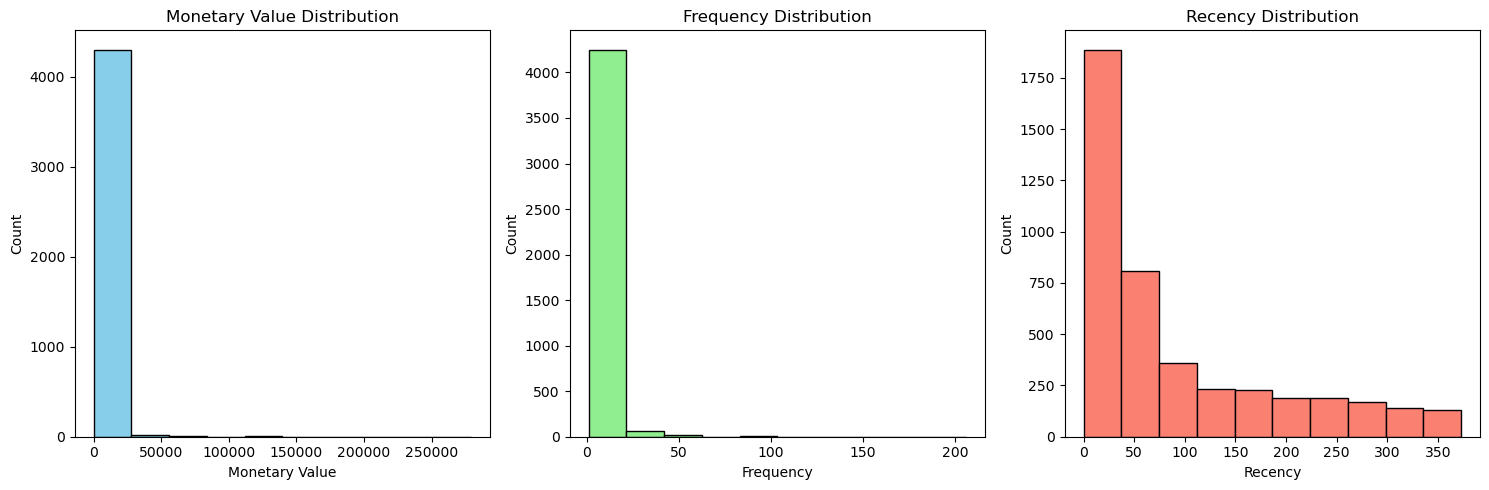

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'],bins = 10,color = 'skyblue',edgecolor = 'black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins = 10,color = 'lightgreen',edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins = 10,color = 'salmon',edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

So really skewed distribution for the first two plots. So let us look at the boxplots for outlier.

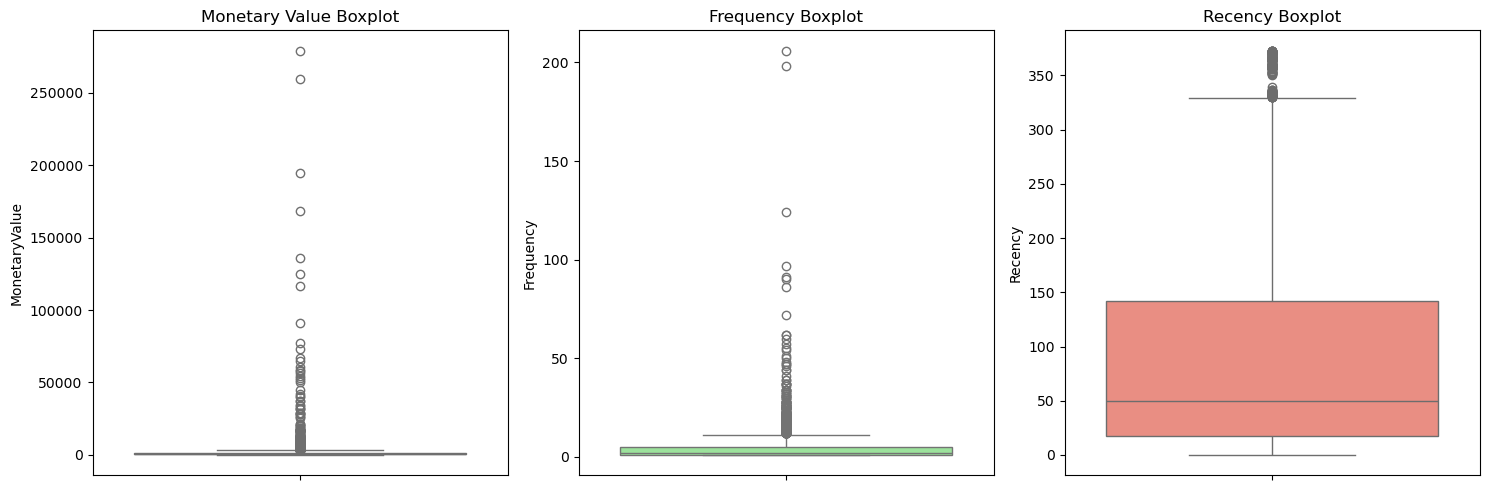

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'],color = 'skyblue')
plt.title('Monetary Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'],color = 'lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

That's very interesting,so we will seperate out the outlier data for further analysis but won't include that in the clustering.

In [22]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

# seperating outlier
monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + M_IQR*1.25)) | 
                                    (aggregated_df['MonetaryValue'] < (M_Q1 - M_IQR*1.25))].copy()
monetary_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
count,482.000000,482.000000,482.000000,482,482.000000
mean,15003.887967,11491.631266,15.585062,2011-11-14 01:13:08.091286272,25.014523
min,12346.000000,3292.140000,1.000000,2010-12-02 15:27:00,0.000000
25%,13328.750000,4007.810000,7.000000,2011-11-13 15:34:30,3.000000
50%,14948.000000,5393.625000,11.000000,2011-11-29 10:48:30,10.000000
75%,16567.000000,8629.932500,18.000000,2011-12-06 10:57:45,25.000000
max,18251.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1779.683354,24678.844379,18.178773,NaN,45.107147


In [23]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

# seperating outlier
frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + F_IQR*1.25)) | 
                                    (aggregated_df['Frequency'] < (F_Q1 - F_IQR*1.25))].copy()
frequency_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
count,332.000000,332.000000,332.000000,332,332.000000
mean,15343.846386,12941.911807,21.123494,2011-11-24 09:58:39.216867328,14.650602
min,12395.000000,1296.440000,11.000000,2010-12-02 15:27:00,0.000000
25%,13979.500000,3881.817500,12.000000,2011-11-22 12:13:30,2.000000
50%,15242.000000,5653.665000,15.000000,2011-12-01 17:13:30,7.000000
75%,16790.000000,10247.362500,22.000000,2011-12-07 11:15:30,17.000000
max,18283.000000,279138.020000,206.000000,2011-12-09 12:49:00,371.000000
std,1728.918343,27848.855108,19.872094,NaN,30.073197


In [24]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) &
                               (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency
count,3792.000000,3792.000000,3792.000000,3792,3792.000000
mean,15332.730485,810.081050,2.657964,2011-08-29 18:04:25.585443072,101.263449
min,12348.000000,3.750000,1.000000,2010-12-01 09:53:00,0.000000
25%,13858.750000,271.737500,1.000000,2011-06-28 11:36:30,22.000000
50%,15345.500000,550.920000,2.000000,2011-10-10 13:59:00,59.000000
75%,16805.250000,1128.067500,4.000000,2011-11-17 08:53:45,164.000000
max,18287.000000,3285.310000,10.000000,2011-12-09 12:50:00,373.000000
std,1710.043097,730.857754,2.030198,NaN,102.271807


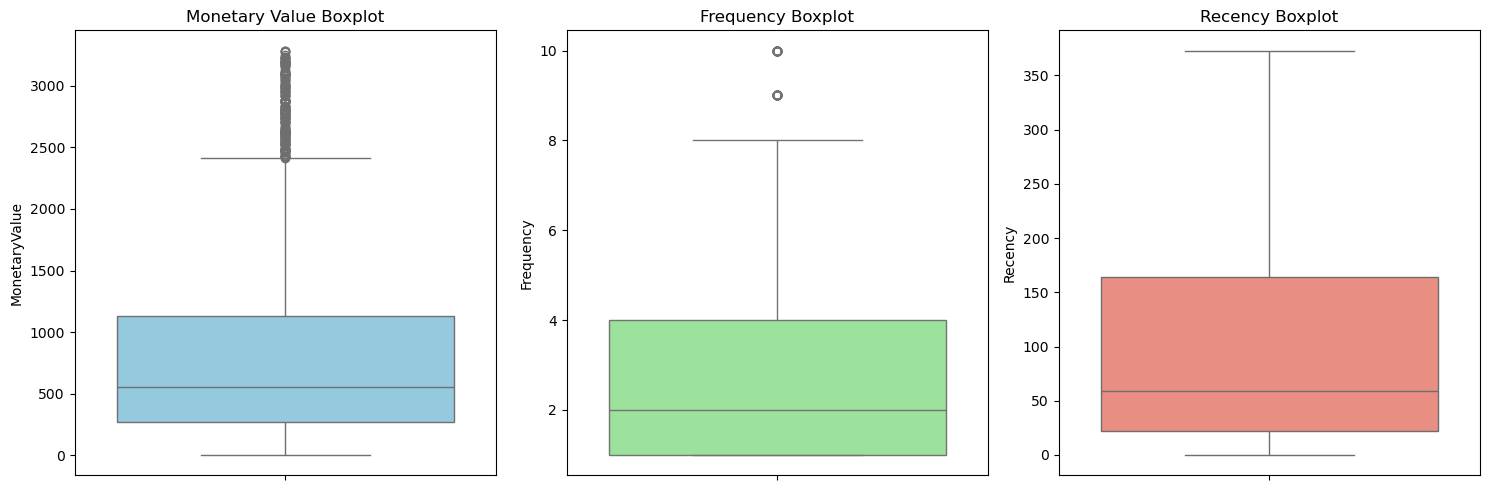

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['MonetaryValue'],color = 'skyblue')
plt.title('Monetary Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['Frequency'],color = 'lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'],color = 'salmon')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

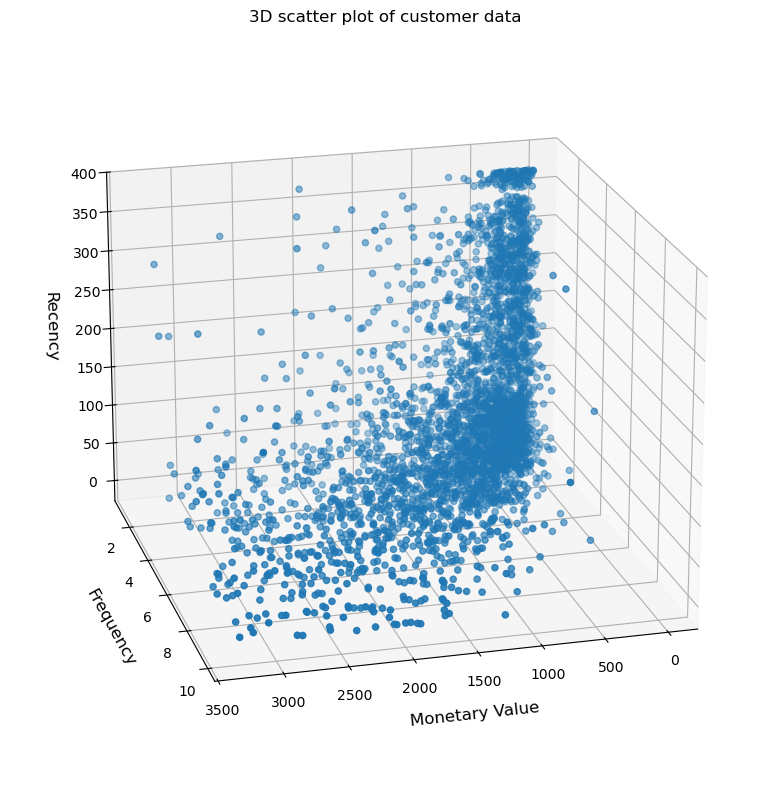

In [35]:
# 3-D plot
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency']
                     )

ax.set_xlabel('Monetary Value', fontsize=12, labelpad=10)
ax.set_ylabel('Frequency', fontsize=12, labelpad=10)
ax.set_zlabel('Recency', fontsize=12, labelpad=10)

ax.set_title('3D scatter plot of customer data')

ax.view_init(elev=20, azim=75)
plt.tight_layout()
plt.show()

You can already see the different scales of the axis,and the K-means clustering algorithm is really sensitive wrt scales. So we will need to do some scaling,we will use standard scaling.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])
scaled_data 

array([[ 0.85822673,  0.66112412, -0.26661351],
       [ 0.88601966, -0.81675915, -0.8142462 ],
       [-0.70567639, -0.81675915,  2.03148799],
       ...,
       [-0.9979469 , -0.81675915,  0.76997696],
       [-0.86489389, -0.3241314 , -0.92181691],
       [ 1.40565577,  0.16849636, -0.57954647]])

In [38]:
scaled_data_df = pd.DataFrame(scaled_data,index = non_outliers_df.index,columns = ('MonetaryValue','Frequency','Recency'))
scaled_data_df 

,MonetaryValue,Frequency,Recency
2,0.858227,0.661124,-0.266614
3,0.886020,-0.816759,-0.814246
4,-0.705676,-0.816759,2.031488
5,0.787752,2.139007,-0.648001
6,-0.986753,-0.816759,0.994898
...,...,...,...
4328,-0.870573,-0.816759,-0.276393
4329,-0.861404,-0.816759,1.718555
4330,-0.997947,-0.816759,0.769977
4331,-0.864894,-0.324131,-0.921817


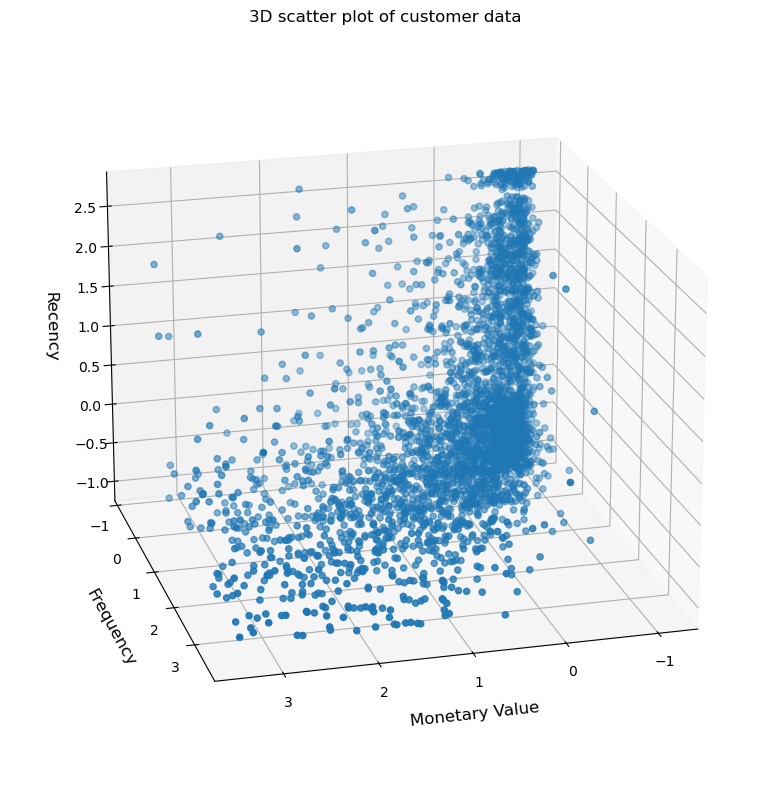

In [39]:
# 3-D plot
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency']
                     )

ax.set_xlabel('Monetary Value', fontsize=12, labelpad=10)
ax.set_ylabel('Frequency', fontsize=12, labelpad=10)
ax.set_zlabel('Recency', fontsize=12, labelpad=10)

ax.set_title('3D scatter plot of customer data')

ax.view_init(elev=20, azim=75)
plt.tight_layout()
plt.show()

# K-Means Clutering

- The number of clusters are determined by the number of centroids.
- To determine the appropriate number of centroids,we want to find the points where these centres are stable.
- We want the avg vector distance between the centroid and the data points to be minimised,this distance is commonly known as **inertia**

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


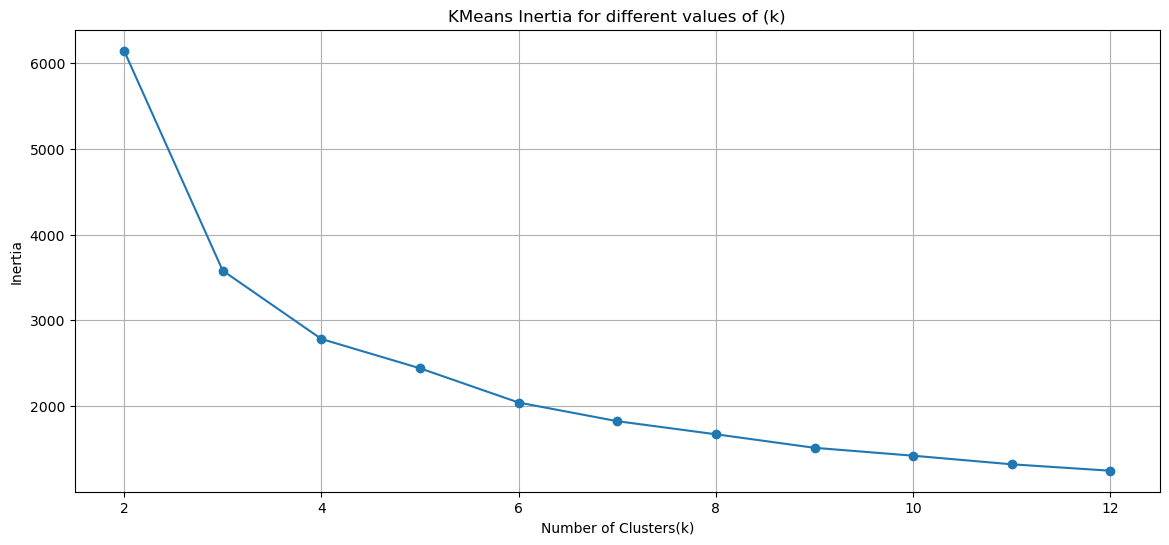

In [41]:
max_k = 12 # max number of clusters we are trying
inertia = []
k_values = range(2,max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,max_iter=1000)

    kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.plot(k_values,inertia,marker='o')
plt.title('KMeans Inertia for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Looking at the graph(elbow method), it looks like we get stablity for k between 4 and 6. But we will check one more metric, **Silhouette Score.** 

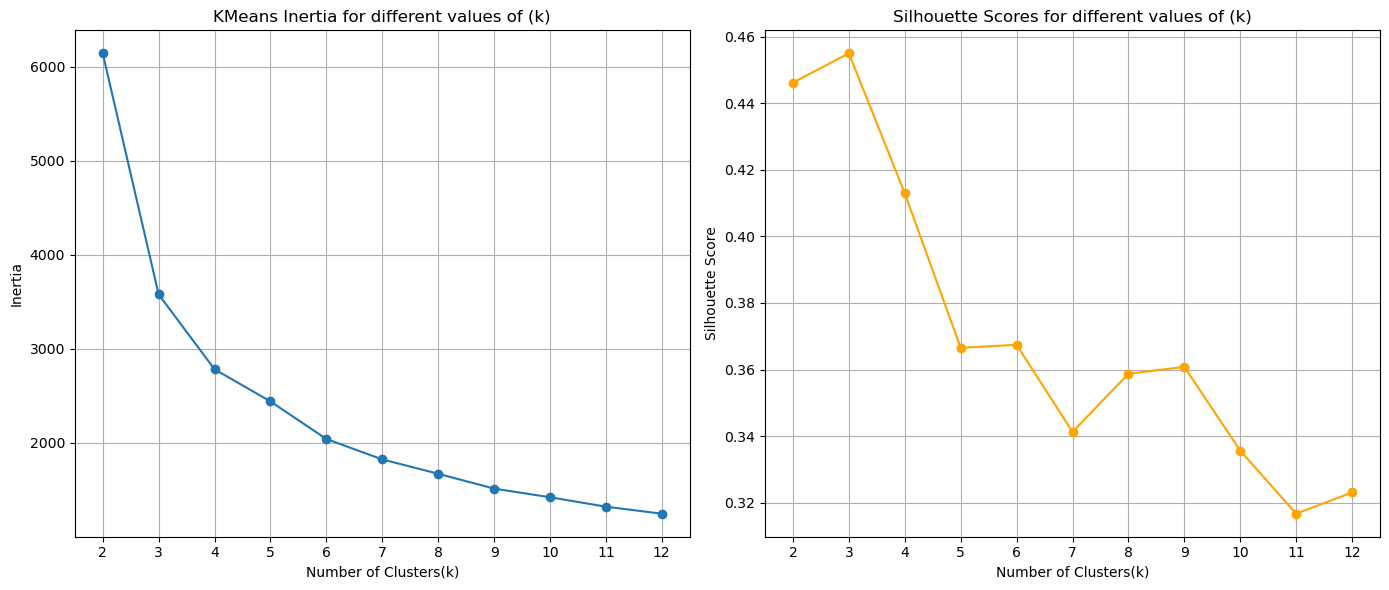

In [42]:
max_k = 12 # max number of clusters we are trying
inertia = []
silhouette_scores = []
k_values = range(2,max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42,max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker='o')
plt.title('KMeans Inertia for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values,silhouette_scores,marker='o',color = 'orange')
plt.title('Silhouette Scores for different values of (k)')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

We will use k=5 over k=6,and generally using less clusters is good because then it minimises the number of clusetrs you need to seperately analyse. It's a tradeoff.

In [43]:
kmeans = KMeans(n_clusters=5,random_state=42,max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([3, 2, 0, ..., 4, 2, 3])

In [44]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

C:\Users\HP\AppData\Local\Temp\ipykernel_22652\395619450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,2
4,12350.0,294.40,1,2011-02-02 16:01:00,309,0
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,1
6,12353.0,89.00,1,2011-05-19 17:47:00,203,4
...,...,...,...,...,...,...
4328,18278.0,173.90,1,2011-09-27 11:58:00,73,2
4329,18280.0,180.60,1,2011-03-07 09:52:00,277,0
4330,18281.0,80.82,1,2011-06-12 10:53:00,180,4
4331,18282.0,178.05,2,2011-12-02 11:43:00,7,2


In [46]:
# Check for NaN or unexpected values
print("Unique cluster values:", non_outliers_df['Cluster'].unique())
print("Any NaN values:", non_outliers_df['Cluster'].isna().sum())

Unique cluster values: [3 2 0 1 4]
Any NaN values: 0


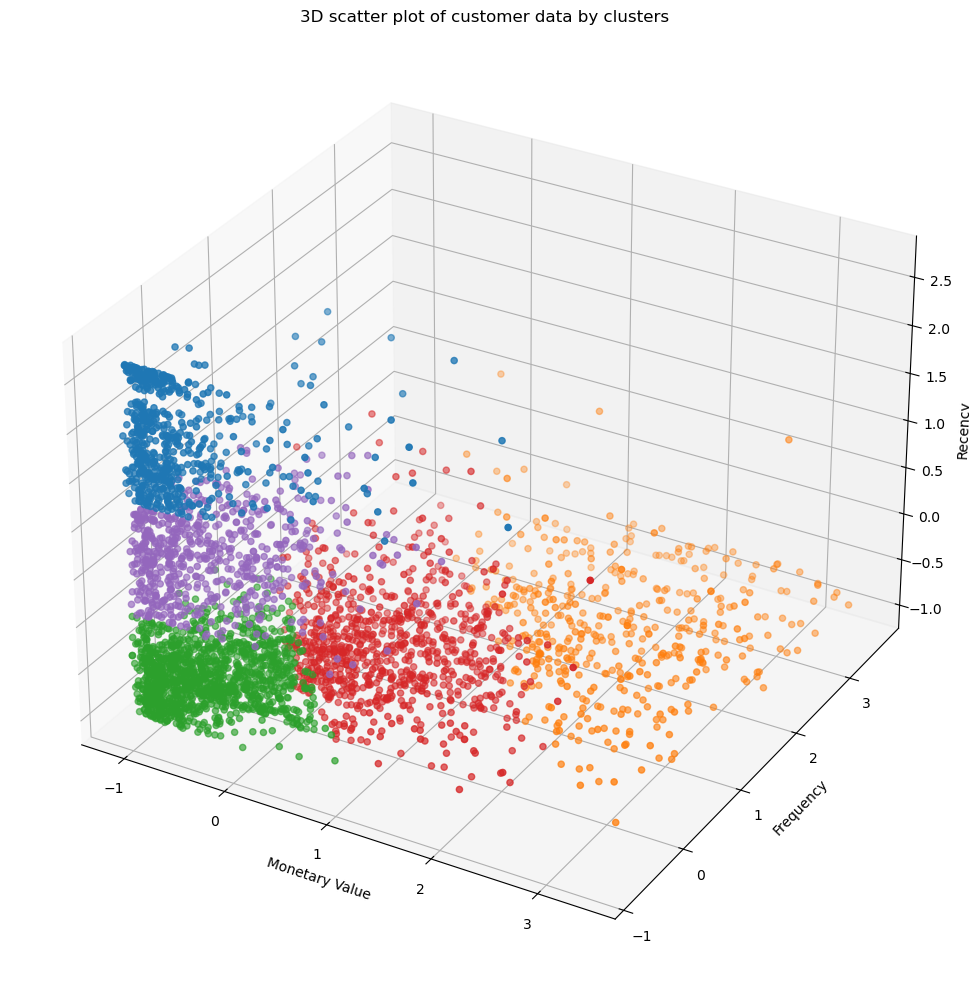

In [56]:
# visualising the different clusters
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728',
    4: '#9467bd'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection= '3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency'],
                     c = colors,
                     marker = 'o'
                     )

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D scatter plot of customer data by clusters')

plt.tight_layout()
plt.show()

# Cluster Analysis

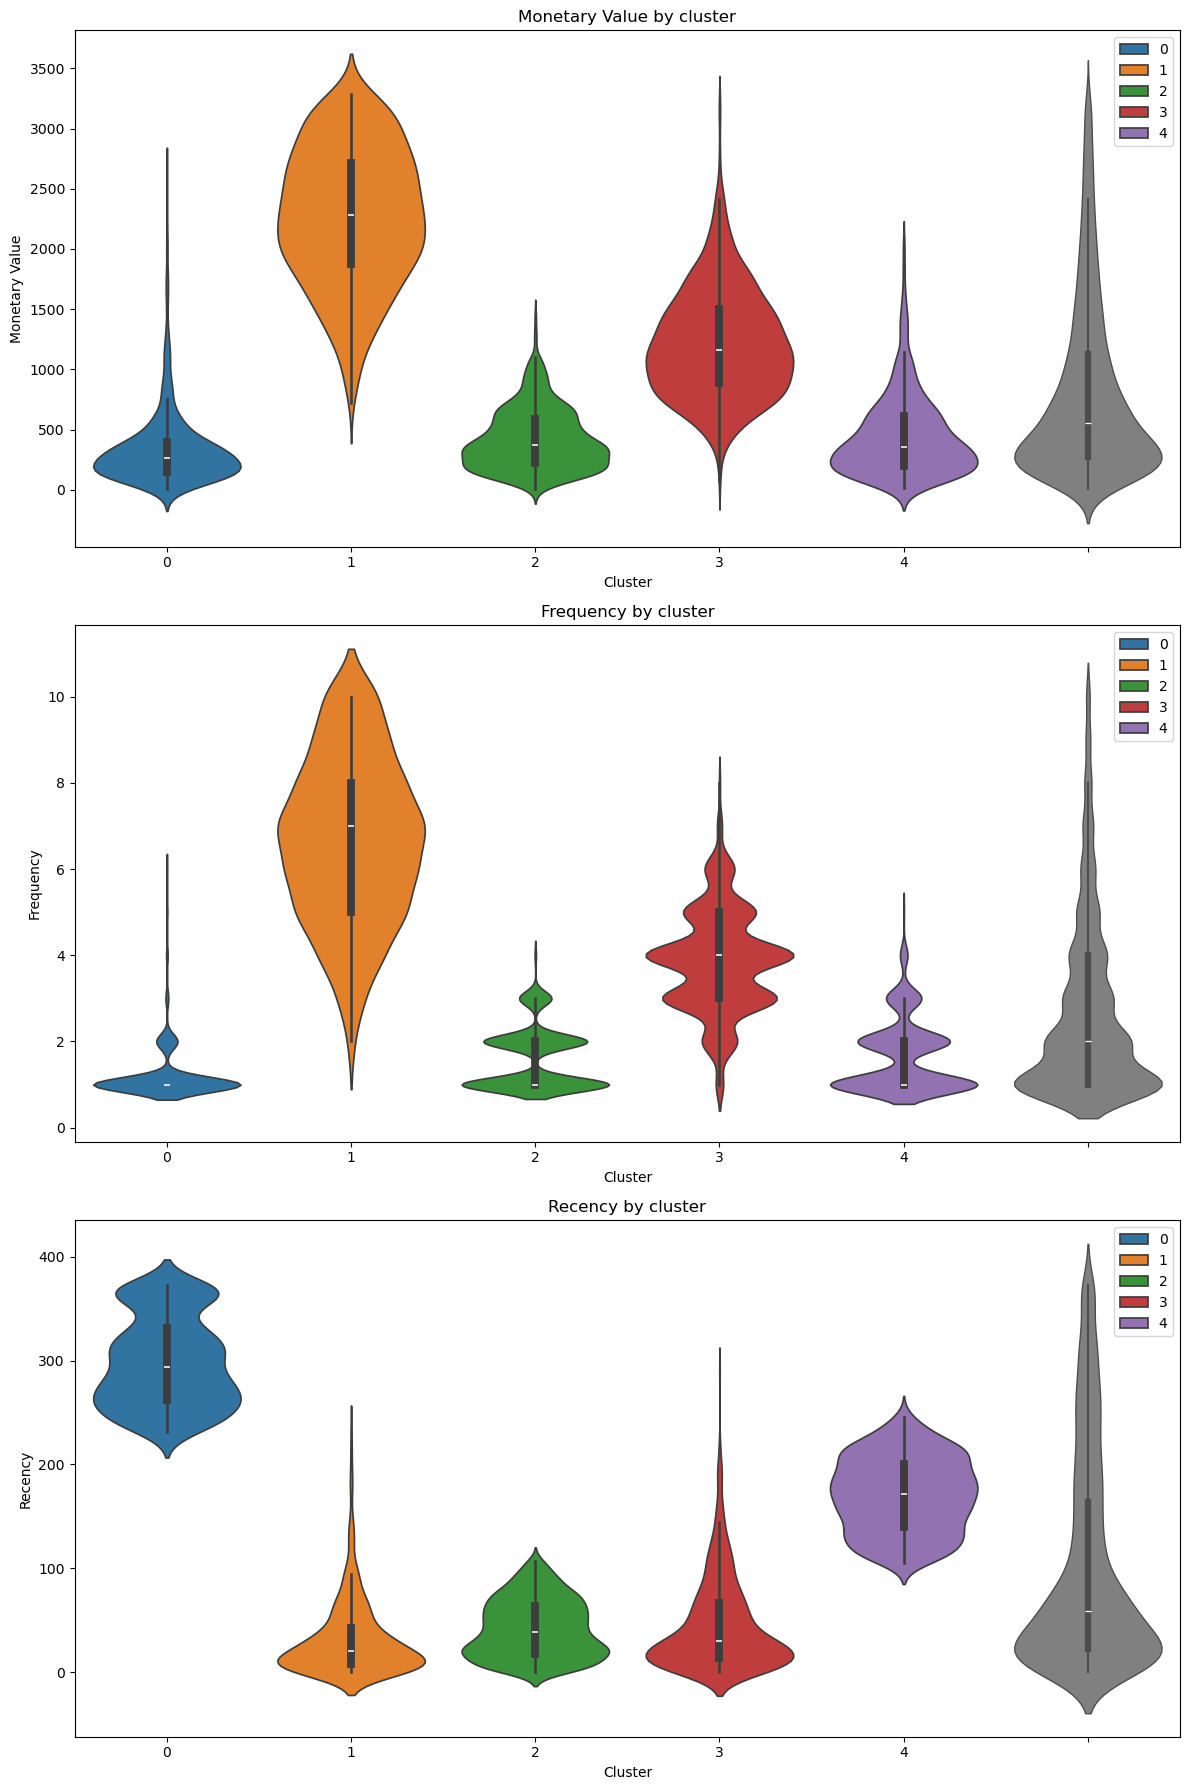

In [57]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['MonetaryValue'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['MonetaryValue'],color = 'gray',linewidth=1.0) # for refernce
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['Frequency'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Frequency'],color = 'gray',linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'],y = non_outliers_df['Recency'],palette=cluster_colors,hue = non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Recency'],color = 'gray',linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

**Cluster 0 (Blue)**
- **Recency**: High (~300+ days)
- **Frequency**: Very low (~1 purchase)
- **Monetary**: Low (~$200-500)
- **Profile**: This cluster represents customers who have made few, small purchases long ago. 

**Cluster 1 (Orange)**
- **Recency**: Very low (~0-50 days)
- **Frequency**: Very high (6-12+ purchases)
- **Monetary**: Very high (~$2000-3500)
- **Profile**: This cluster represents our **best customers**. They buy frequently, spend heavily, and are recently active.

 **Cluster 2 (Green)**
- **Recency**: Low (~20-80 days)
- **Frequency**: Low-moderate (1-3 purchases)
- **Monetary**: Moderate (~$200-800)
- **Profile**: This cluster represents steady and moderate customers with decent engagement.

 **Cluster 3 (Red)**
- **Recency**: Low (~20-100 days) 
- **Frequency**: Moderate (3-6 purchases)
- **Monetary**: Medium-high (~$800-2500)
- **Profile**: This cluster represents good customers with solid purchase behavior.

 **Cluster 4 (Purple)**
- **Recency**: High (~150-250 days)
- **Frequency**: Low (1-4 purchases)
- **Monetary**: Low-moderate (~$200-1000)
- **Profile**: This cluster represents customers who were previously engaged but now they are inactive..

 **Business Recommendations:**
- **Cluster 1**: Implement a robust loyalty program,provide exclusive offers and recognise their loyalty to keep them engaged and satsfied.
- **Cluster 2**: Focus on building relationships,providing excellent customer service,and offering incentives to encourage more frequent purchases.
- **Cluster 3**: Upsell to higher-value products
- **Cluster 4**: Re-engagement campaigns to prevent churn,they are prime candidates for **win-back campaigns**
- **Cluster 0**: They may be dormant or are one-time buyers. Consider if worth reactivating or let naturally churn.


# Outlier Analysis


In [58]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([  55,   69,   75,  100,  103,  105,  122,  155,  189,  223,
       ...
       4189, 4197, 4202, 4209, 4248, 4268, 4287, 4289, 4290, 4293],
      dtype='int64', length=272)

In [59]:
# Creating three new clusters
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = monetary_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

outliers_cluster_df = pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])

outliers_cluster_df

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
0,12346.0,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.0,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.0,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.0,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.0,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3
4290,18226.0,5228.05,11,2011-10-26 13:36:00,43,-3


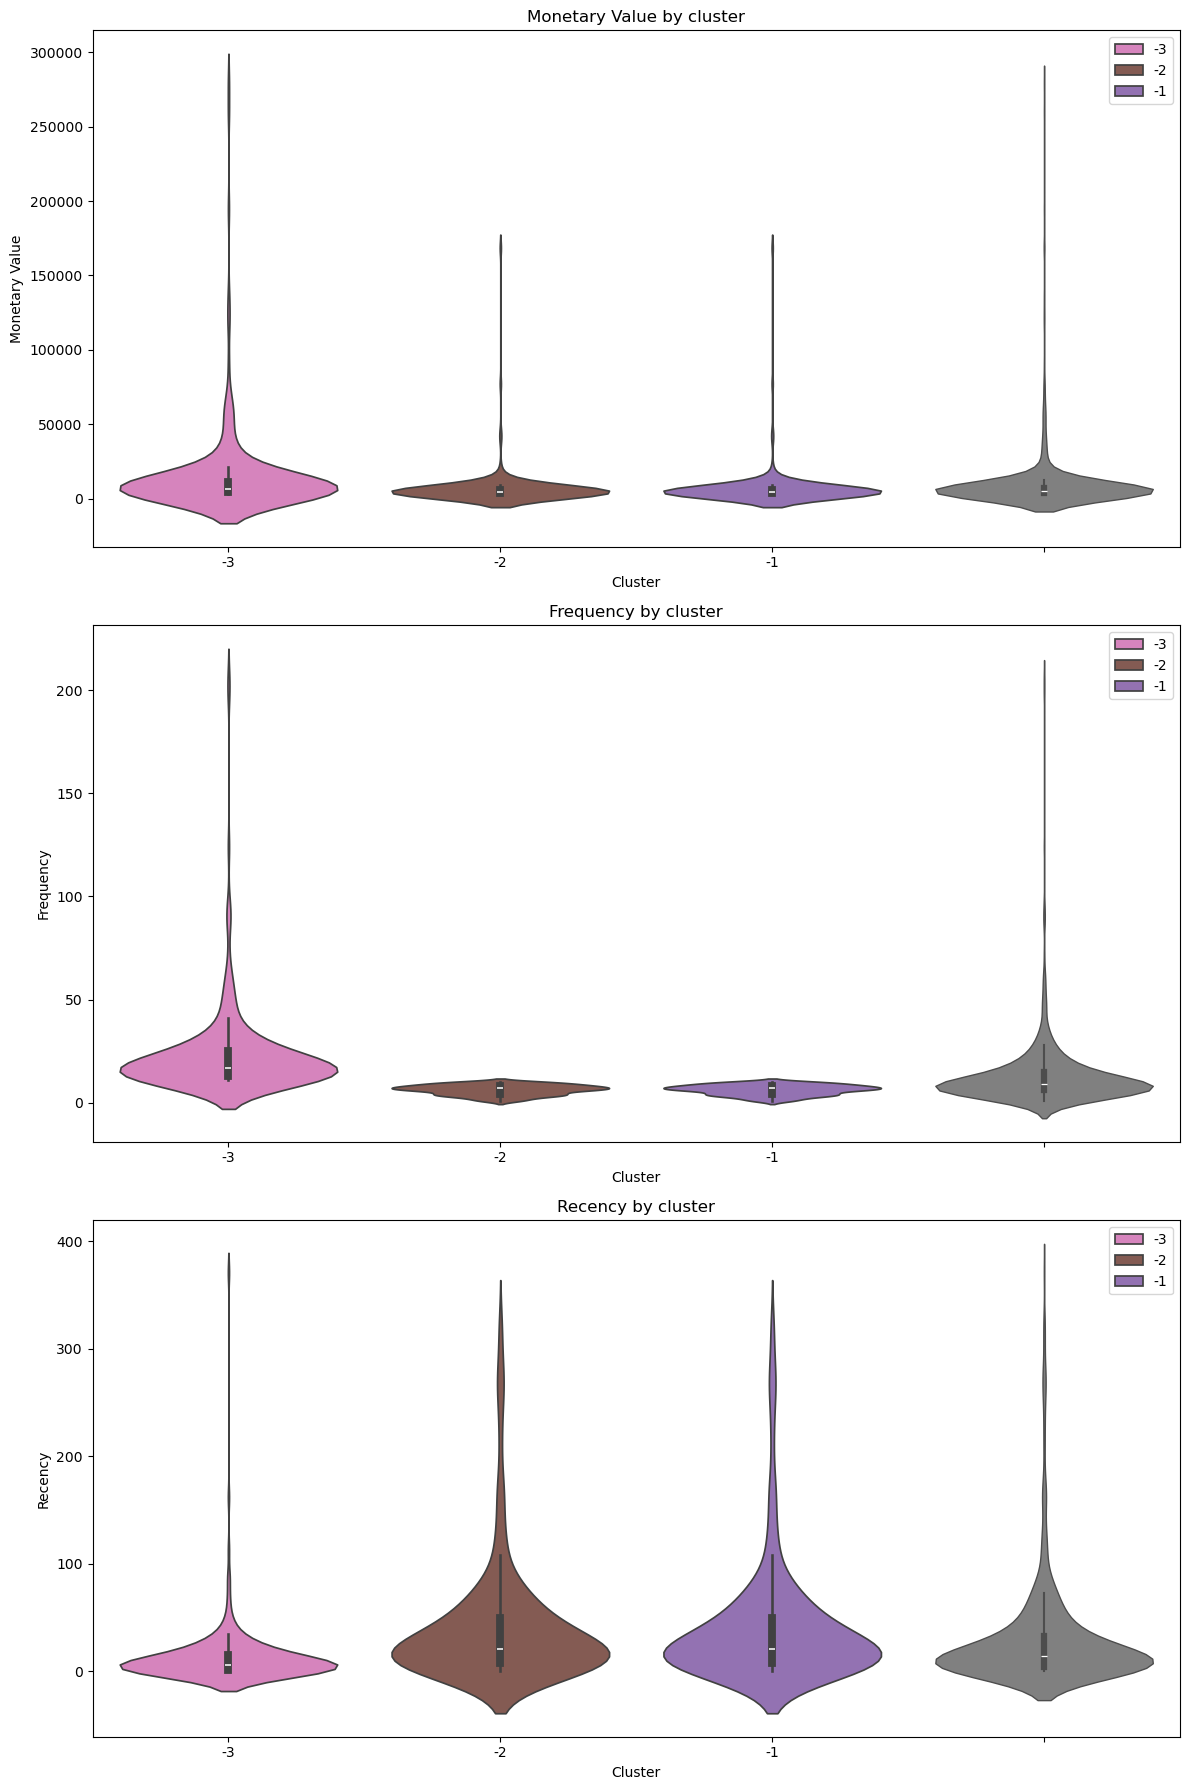

In [60]:
cluster_colors = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['MonetaryValue'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['MonetaryValue'],color = 'gray',linewidth=1.0) # for refernce
plt.title('Monetary Value by cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['Frequency'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['Frequency'],color = 'gray',linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outliers_cluster_df['Cluster'],y = outliers_cluster_df['Recency'],palette=cluster_colors,hue = outliers_cluster_df['Cluster'])
sns.violinplot(y = outliers_cluster_df['Recency'],color = 'gray',linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


- **Cluster -1 (Monetary Outliers) PAMPER:** 
    1. Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
    2. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

- **Cluster -2 (Frequency Outliers) UPSELL:** 
    1. Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. 
    2. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

- **Cluster -3 (Monetary & Frequency Outliers) DELIGHT:**
    1. Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. 
    2. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [62]:
cluster_labels = {
    0: "CHURN",
    1: "REWARD",
    2: "NURTURE",
    3: "UPSELL",
    4: "RE-ENGAGE",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [63]:
full_clustering_df = pd.concat([non_outliers_df, outliers_cluster_df])

full_clustering_df

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,2
4,12350.0,294.40,1,2011-02-02 16:01:00,309,0
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,1
6,12353.0,89.00,1,2011-05-19 17:47:00,203,4
...,...,...,...,...,...,...
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3
4290,18226.0,5228.05,11,2011-10-26 13:36:00,43,-3


In [64]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,CustomerID,MonetaryValue,Frequency,LastInvoice,Recency,Cluster,ClusterLabel
2,12348.0,1437.24,4,2011-09-25 13:13:00,74,3,UPSELL
3,12349.0,1457.55,1,2011-11-21 09:51:00,18,2,NURTURE
4,12350.0,294.40,1,2011-02-02 16:01:00,309,0,CHURN
5,12352.0,1385.74,7,2011-11-03 14:37:00,35,1,REWARD
6,12353.0,89.00,1,2011-05-19 17:47:00,203,4,RE-ENGAGE
...,...,...,...,...,...,...,...
4268,18198.0,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4287,18223.0,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4289,18225.0,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT
4290,18226.0,5228.05,11,2011-10-26 13:36:00,43,-3,DELIGHT


# Visualisation

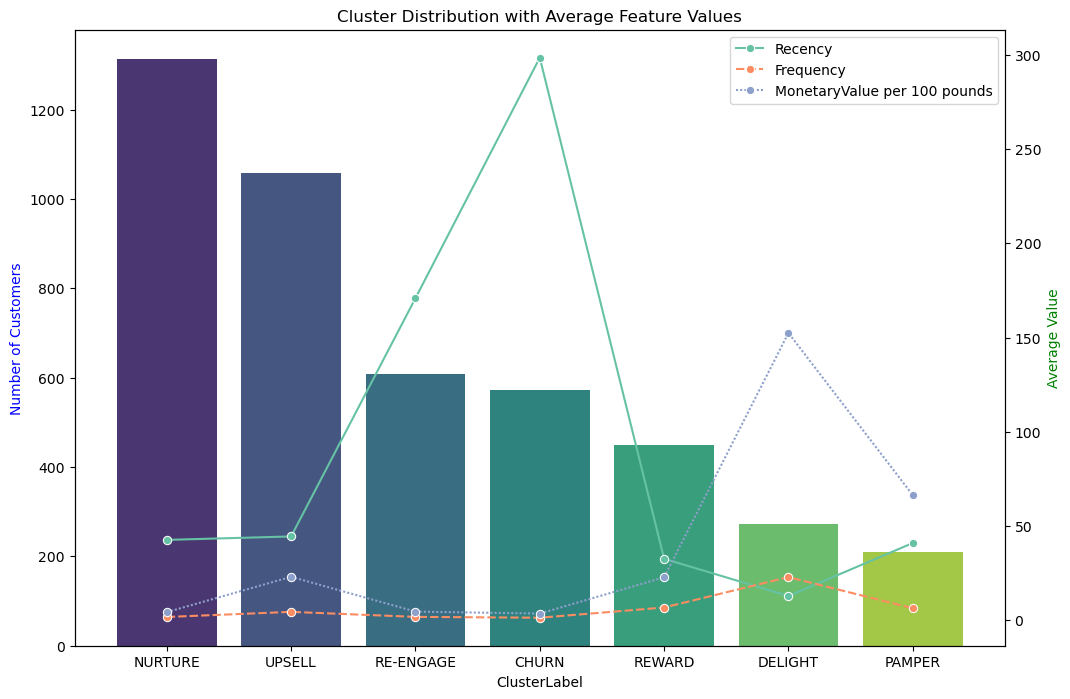

In [65]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()